# Let's write some tests

## Testing environment.py

In [1]:
from IPython.display import HTML
from texrelenv.colour import get_kelly_colours

def show_colours(colours):
    html = ""
    for c in colours:
        r, g, b = c
        html += f'<div style="height=2em;width=2em;background:rgb({r}, {g}, {b});">{c}</div>\n'
    return HTML(html, metadata=dict(isolated=True))

show_colours(get_kelly_colours()[:5])

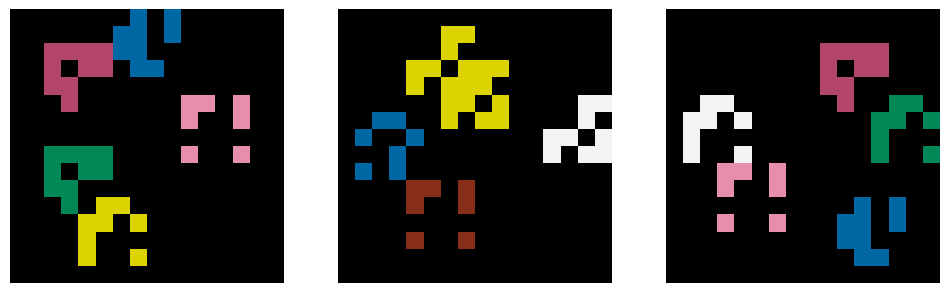

In [43]:
from texrelenv.environment import ThingMaker, Grid
from PIL import Image
import matplotlib.pyplot as plt

tm = ThingMaker()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis("off")
    grid = Grid(hard_boundary=True)
    things = [tm.thing() for _ in range(10)]
    grid.pack(things)
    plt.imshow(Image.fromarray(grid.array()))
